In [1]:
# importing the neccessary libraries
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt


In [2]:
data = pd.read_excel("walmart Retail Data.xlsx")
print(data.head())


         City  Customer Age      Customer Name Customer Segment  Discount  \
0  McKeesport           NaN     Jessica Myrick   Small Business      0.10   
1       Bowie           NaN     Matt Collister      Home Office      0.08   
2        Napa           NaN  Alan Schoenberger        Corporate      0.00   
3  Montebello           NaN  Elizabeth Moffitt         Consumer      0.08   
4        Napa           NaN  Alan Schoenberger        Corporate      0.07   

   Number of Records Order Date  Order ID Order Priority  Order Quantity  ...  \
0                  1 2012-01-01     28774           High              32  ...   
1                  1 2012-01-01     13729  Not Specified               9  ...   
2                  1 2012-01-02     37537            Low               4  ...   
3                  1 2012-01-02     44069       Critical              43  ...   
4                  1 2012-01-02     37537            Low              43  ...   

    Profit Region Row ID    Sales  Ship Date      

17:24:39 - cmdstanpy - INFO - Chain [1] start processing
17:24:42 - cmdstanpy - INFO - Chain [1] done processing


             ds         yhat   yhat_lower   yhat_upper
1778 2016-12-25  2231.302823 -2366.610404  6749.795317
1779 2016-12-26  2070.404529 -2439.707275  6590.538907
1780 2016-12-27  2428.224512 -2127.416353  6970.348736
1781 2016-12-28  2433.473027 -2162.943849  6518.084990
1782 2016-12-29  2348.169155 -1986.131885  6818.719921


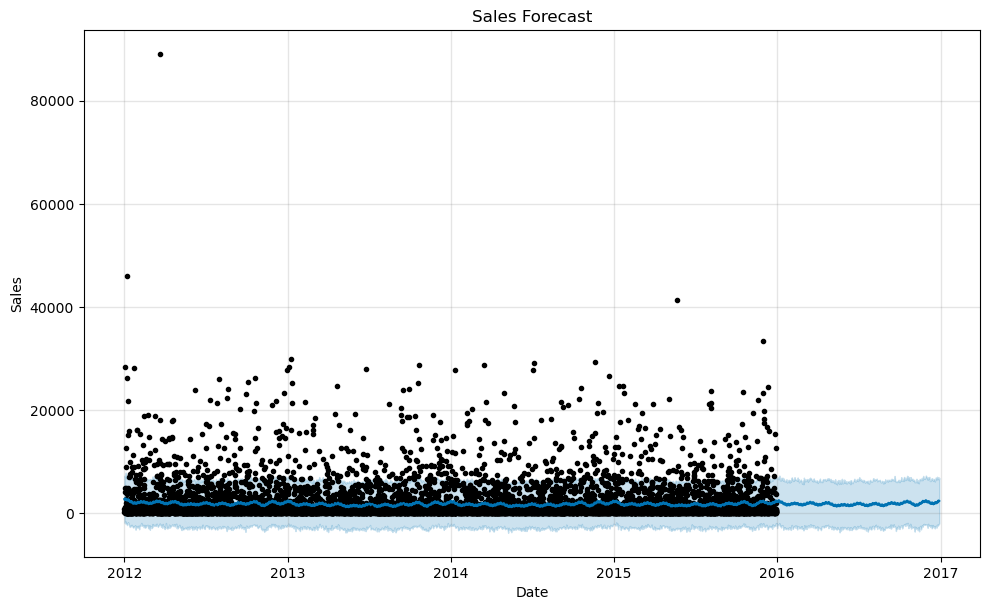

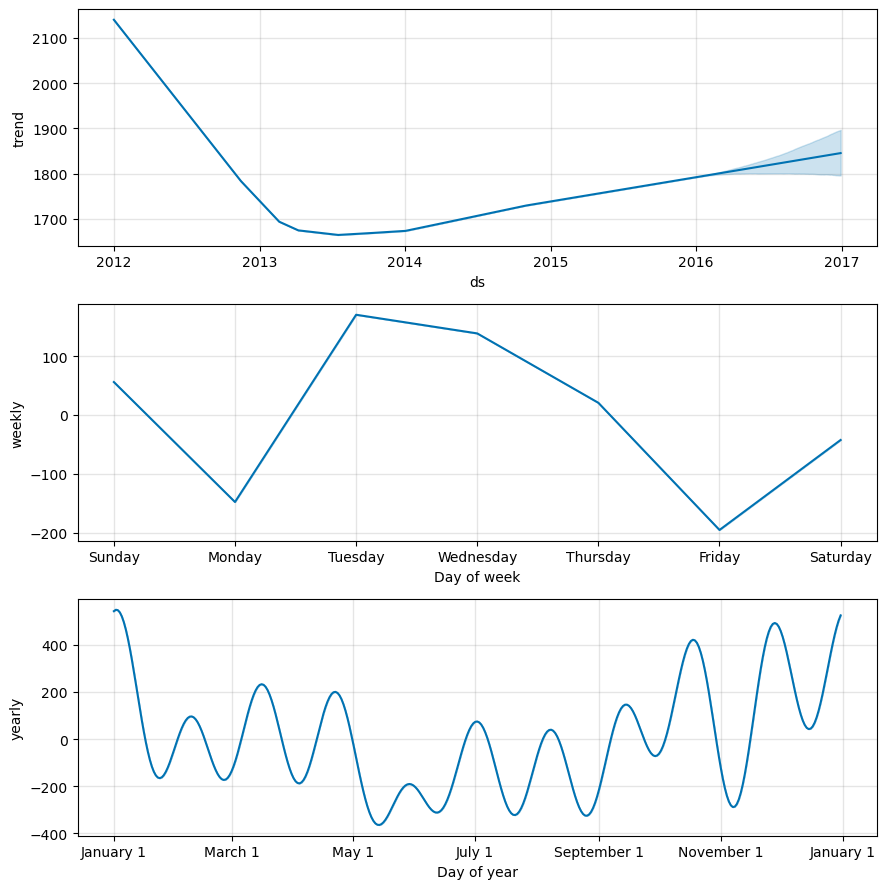

In [3]:
# Preprocessing
data['Order Date'] = pd.to_datetime(data['Order Date'])
data = data.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
data = data[['ds', 'y']]  # Ensure only necessary columns are present

# Initialize the Prophet model
model = Prophet()

# Fit the model on the data
model.fit(data)

# Create a dataframe for future dates (365 days)
future = model.make_future_dataframe(periods=365)

# Predict future sales
forecast = model.predict(future)

# Display the forecasted data
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Plot the forecast
fig1 = model.plot(forecast)
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Plot the forecast components
fig2 = model.plot_components(forecast)
plt.show()

In [4]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [5]:
data = pd.read_excel("walmart Retail Data.xlsx")

In [6]:
# Preprocessing
data['Order Date'] = pd.to_datetime(data['Order Date'])
data = data.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
data = data[['ds', 'y']]  

In [7]:
data_weekly=data.resample('W-MON',on='ds').sum().reset_index()
data_weekly

,ds,y
0,2012-01-02,12154.7100
1,2012-01-09,184082.3865
2,2012-01-16,104938.8405
3,2012-01-23,117531.9835
4,2012-01-30,78733.4990
...,...,...
205,2015-12-07,137214.5840
206,2015-12-14,93011.1515
207,2015-12-21,56664.9445
208,2015-12-28,45776.1880


In [8]:
split_data=int(len(data_weekly)*0.8)

In [9]:
split_data

168

In [10]:
train_data=data_weekly.iloc[:split_data]
test_data=data_weekly.iloc[split_data:]

In [11]:
model=Prophet()

In [12]:
model.fit(train_data)

17:26:41 - cmdstanpy - INFO - Chain [1] start processing
17:26:41 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
future=model.make_future_dataframe(periods=12,freq='W-MON')

In [14]:
forecast=model.predict(future)

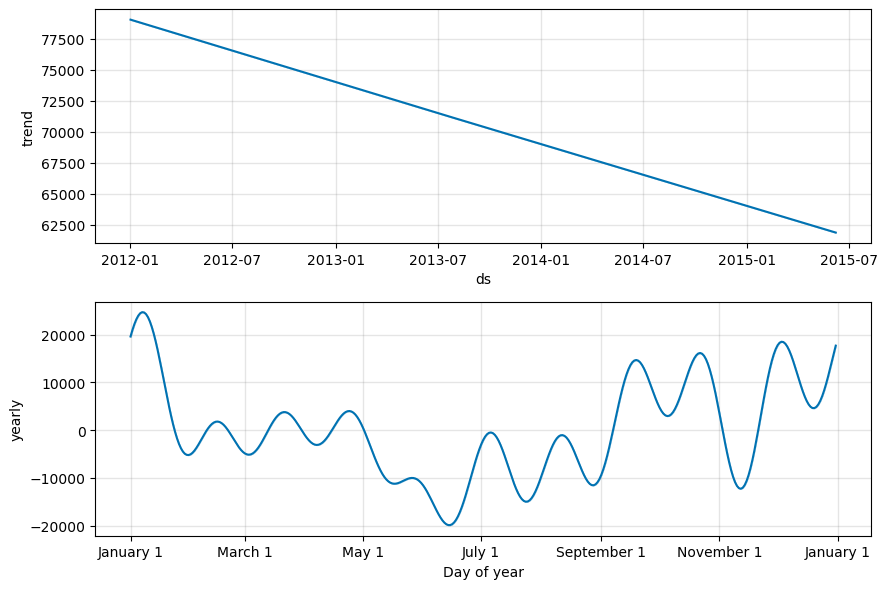

In [15]:
fig=model.plot_components(forecast)